In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
book_sales = pd.read_csv(r"C:\Users\enapi\Bootcamp - Copy\Data Storytelling\Books_Data_Clean.csv")
book_sales.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [3]:
book_sales_df = book_sales.dropna()

In [4]:
book_sales_df.columns

Index(['index', 'Publishing Year', 'Book Name', 'Author', 'language_code',
       'Author_Rating', 'Book_average_rating', 'Book_ratings_count', 'genre',
       'gross sales', 'publisher revenue', 'sale price', 'sales rank',
       'Publisher ', 'units sold'],
      dtype='object')

In [5]:
book_sales_df['language_code'].unique()

array(['en-US', 'eng', 'spa', 'en-GB', 'fre', 'en-CA', 'nl', 'ara'],
      dtype=object)

In [6]:
book_sales_df['genre'].unique()

array(['genre fiction', 'fiction', 'nonfiction', 'children'], dtype=object)

In [7]:
book_sales_df.loc[book_sales_df['genre'] == 'genre fiction', 'genre'] = 'fiction'

In [8]:
book_sales_df['genre'].unique()

array(['fiction', 'nonfiction', 'children'], dtype=object)

In [9]:
book_sales_df.describe().T

,count,mean,std,min,25%,50%,75%,max
index,998.0,529.619238,308.616860,0.00,263.2500,530.500,793.7500,1069.00
Publishing Year,998.0,1971.070140,190.019592,-560.00,1985.0000,2003.000,2010.0000,2016.00
Book_average_rating,998.0,4.003056,0.247360,2.97,3.8500,4.010,4.1700,4.77
Book_ratings_count,998.0,95500.622244,31650.845116,27308.00,70946.5000,89901.000,115596.0000,206792.00
gross sales,998.0,1885.085150,4023.268770,104.94,370.8825,806.250,1492.9650,47795.00
publisher revenue,998.0,848.897952,2303.504061,0.00,0.0000,260.619,721.1805,28677.00
sale price,998.0,4.839649,3.585046,0.99,1.9900,3.990,6.9900,33.86
sales rank,998.0,605.750501,369.174705,1.00,283.0000,591.500,919.5000,1273.00
units sold,998.0,9802.312625,15503.088302,106.00,555.0000,3915.000,5420.2500,61560.00


Null hypothesis: Author rating will not have an effect on book sales

In [10]:
unique_author_ratings = book_sales_df['Author_Rating'].unique()
print(unique_author_ratings)

['Novice' 'Intermediate' 'Famous' 'Excellent']


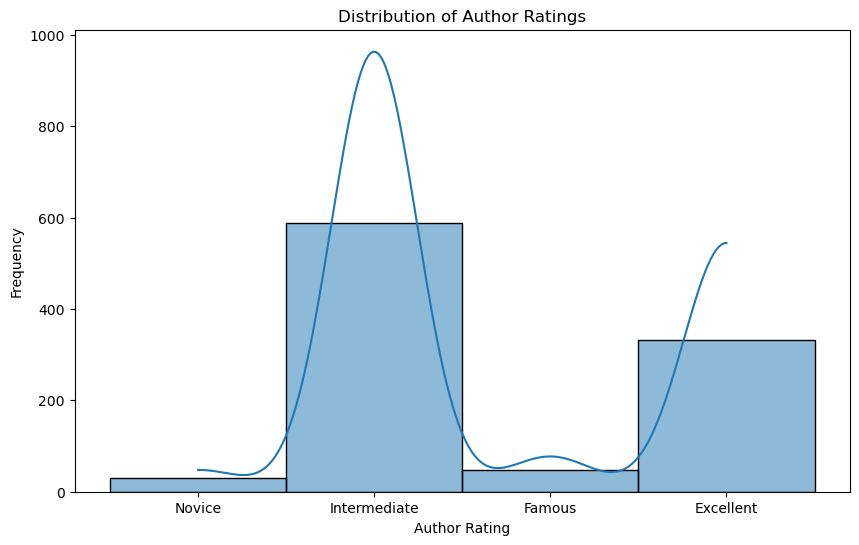

In [11]:
#distribution of ratings
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(book_sales_df['Author_Rating'], bins=20, kde=True)
plt.title('Distribution of Author Ratings')
plt.xlabel('Author Rating')
plt.ylabel('Frequency')
plt.show()

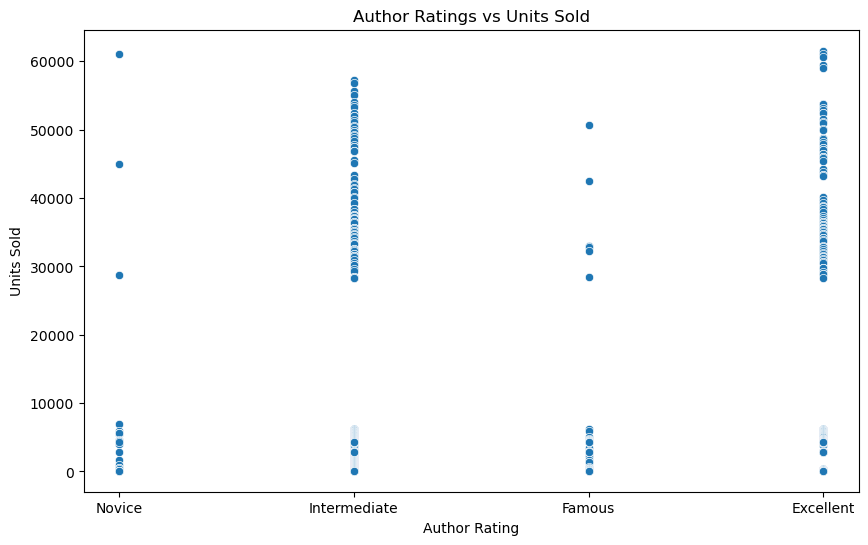

In [12]:
#scatterplot for initial visualization 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Author_Rating', y='units sold', data=book_sales_df)
plt.title('Author Ratings vs Units Sold')
plt.xlabel('Author Rating')
plt.ylabel('Units Sold')
plt.show()

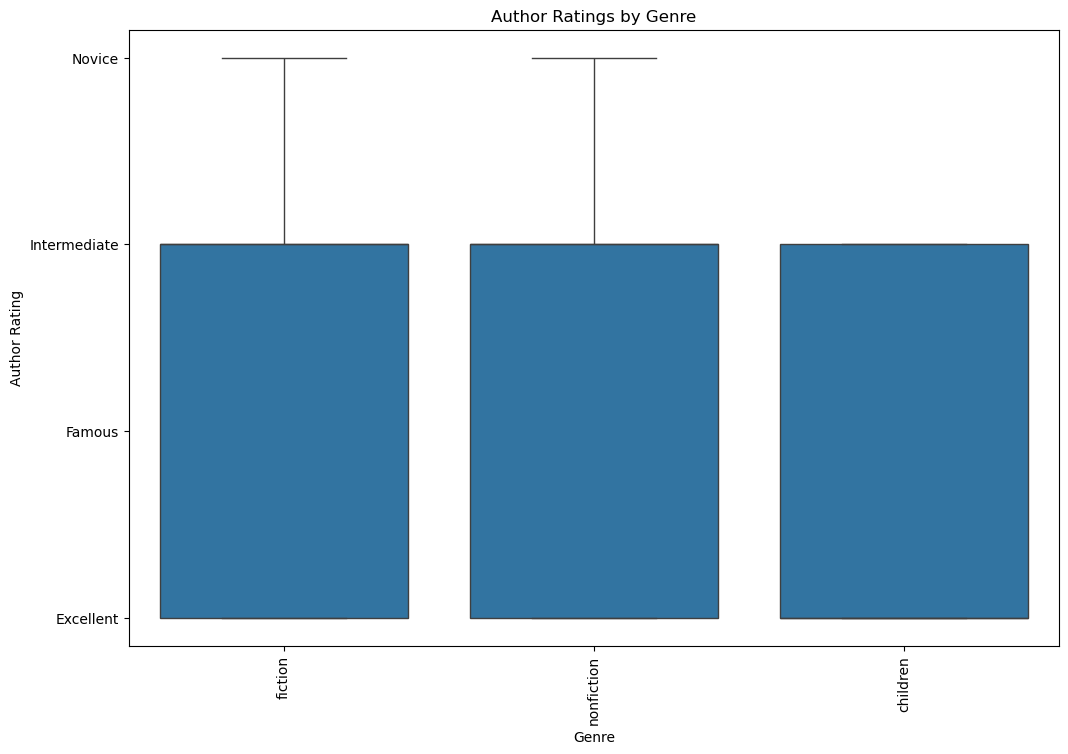

genre          children  fiction  nonfiction
Author_Rating                               
Excellent           8.0    263.0        62.0
Famous              0.0     37.0        10.0
Intermediate        7.0    504.0        78.0
Novice              0.0     23.0         6.0


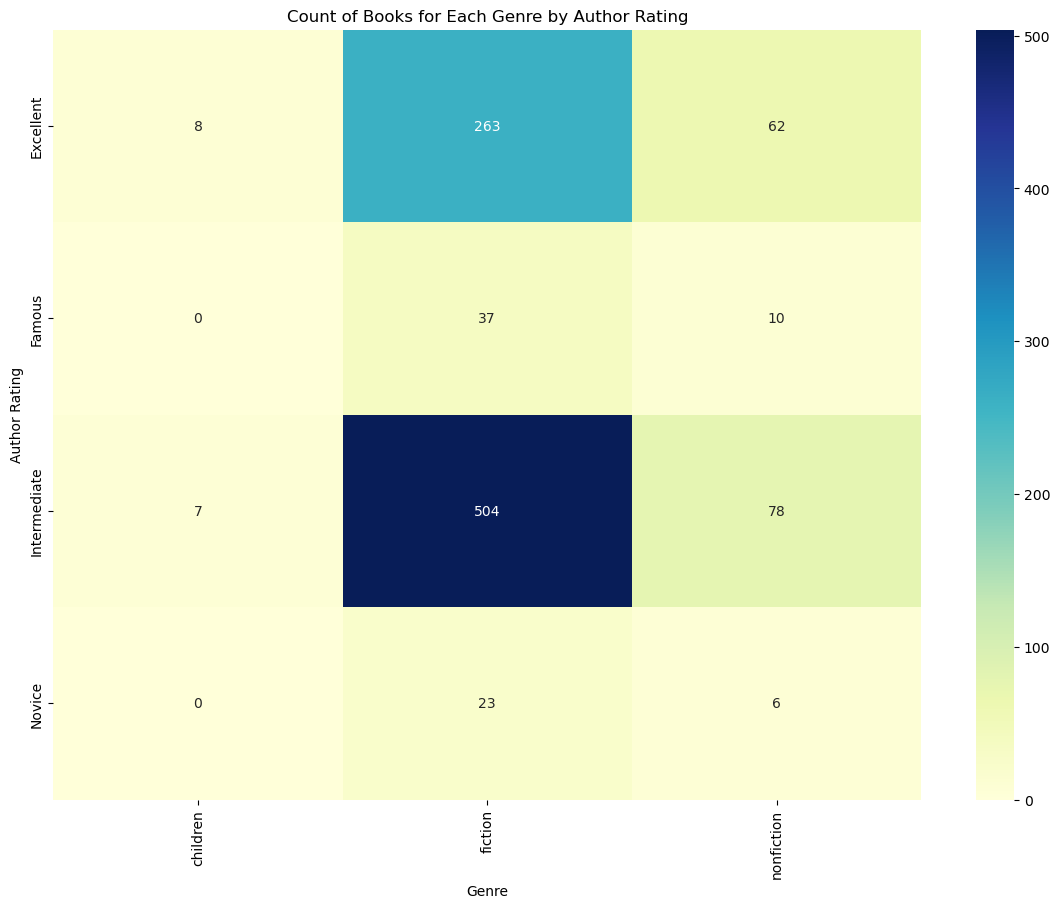

In [13]:
#look for trends within author rating
plt.figure(figsize=(12, 8))
sns.boxplot(x='genre', y='Author_Rating', data=book_sales_df)
plt.title('Author Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Author Rating')
plt.xticks(rotation=90)
plt.show()

genre_rating_counts = book_sales_df.groupby(['Author_Rating', 'genre']).size().reset_index(name='count')
genre_rating_pivot = genre_rating_counts.pivot(index='Author_Rating', columns='genre', values='count').fillna(0)
print(genre_rating_pivot.head())

# Create a heatmap for the pivot table
plt.figure(figsize=(14, 10))
sns.heatmap(genre_rating_pivot, cmap='YlGnBu', annot=True, fmt='g')

plt.title('Count of Books for Each Genre by Author Rating')
plt.xlabel('Genre')
plt.ylabel('Author Rating')
plt.xticks(rotation=90)
plt.show()

  Author_Rating  Author_Rating_Numeric
0        novice                      1
1  intermediate                      2
2        novice                      1
3  intermediate                      2
4  intermediate                      2
                       Author_Rating_Numeric  units sold  gross sales
Author_Rating_Numeric               1.000000    0.174809    -0.212804
units sold                          0.174809    1.000000    -0.152192
gross sales                        -0.212804   -0.152192     1.000000


C:\Users\enapi\AppData\Local\Temp\ipykernel_1900\425987324.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_sales_df['Author_Rating'] = book_sales_df['Author_Rating'].str.strip().str.lower()
C:\Users\enapi\AppData\Local\Temp\ipykernel_1900\425987324.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_sales_df['Author_Rating_Numeric'] = book_sales_df['Author_Rating'].map(rating_mapping)


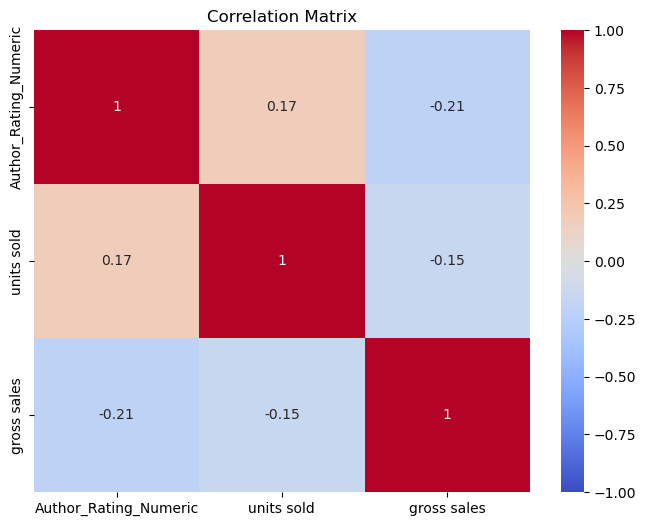

In [14]:
book_sales_df['Author_Rating'] = book_sales_df['Author_Rating'].str.strip().str.lower()

# Define the corrected mapping
rating_mapping = {
    'novice': 1,
    'intermediate': 2,
    'famous': 3,
    'excellent': 4
}

# Apply the corrected mapping
book_sales_df['Author_Rating_Numeric'] = book_sales_df['Author_Rating'].map(rating_mapping)

# Verify the new column
print(book_sales_df[['Author_Rating', 'Author_Rating_Numeric']].head())

correlation_matrix = book_sales_df[['Author_Rating_Numeric', 'units sold', 'gross sales']].corr()

# Display the correlation matrix
print(correlation_matrix)

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [15]:
print(book_sales_df.dtypes)


index                      int64
Publishing Year          float64
Book Name                 object
Author                    object
language_code             object
Author_Rating             object
Book_average_rating      float64
Book_ratings_count         int64
genre                     object
gross sales              float64
publisher revenue        float64
sale price               float64
sales rank                 int64
Publisher                 object
units sold                 int64
Author_Rating_Numeric      int64
dtype: object


In [17]:
import statsmodels.api as sm
book_sales_df['units sold'] = pd.to_numeric(book_sales_df['units sold'], errors='coerce')
book_sales_df['gross sales'] = pd.to_numeric(book_sales_df['gross sales'], errors='coerce')

# Drop rows with missing values
book_sales_df = book_sales_df.dropna(subset=['Author_Rating_Numeric', 'units sold', 'gross sales'])

# Define independent and dependent variables
X = book_sales_df[['Author_Rating_Numeric', 'units sold']]
X = sm.add_constant(X)  # Adds a constant term for the intercept
y = book_sales_df['gross sales']  # Example dependent variable

# Fit the regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            gross sales   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     31.15
Date:                Mon, 22 Jul 2024   Prob (F-statistic):           7.55e-14
Time:                        23:46:59   Log-Likelihood:                -9668.5
No. Observations:                 998   AIC:                         1.934e+04
Df Residuals:                     995   BIC:                         1.936e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  4324.82

The OLS results(Author_Rating_Numeric  -796.1641, p-value of 0.00) paired with the weak correlation matrix between author ratings and gross sales would suggest that there is evidence to reject the mull hypothesis and state that author ratings do impact gross sales.However, the low R-squared value indicates that the model explains only a small portion of the variability in sales. Further modeling is needed to gain more insight. Additionally, improving the methodology for scaling author ratings as a categorical variable could enhance the accuracy of the analysis.